# Proyecto final de Python para Data Science
## Estudiante: Erick J. Pineda Amézquita
## Carnet:        17012140

Problema a resolver:

Crear un modelo lineal univariable para predecir el precio de casas en base a variables obtenidas, según los valores proporcionados en el archivo: "proyecto_training_data.npy"


#### Importar paquetes/librerías a utilizar:

In [262]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import lmplot
import sklearn as sl
from sklearn.linear_model import LinearRegression


Extracción de los datos a partir del archivo .npy

In [263]:
origenDeDatos = np.load('proyecto_training_data.npy')
type(origenDeDatos)

##np.savetxt("data.txt", OrigenDeDatos.tolist())
##OrigenDeDatos.tolist()


numpy.ndarray

### Separación de los datos en 80% y 20%

In [264]:
numDatosEntrenamiento=int(0.8*origenDeDatos.shape[0])
print("Cantidad de datos para ENTRENAMIENTO:   ", numDatosEntrenamiento)

numDatosValidacion=int(0.2*origenDeDatos.shape[0])
print("Cantidad de datos para VALIDACION:      ", numDatosValidacion)


Cantidad de datos para ENTRENAMIENTO:    1168
Cantidad de datos para VALIDACION:       292


#### Creación de Data Frames

In [265]:
dfEntrenamiento = pd.DataFrame(origenDeDatos[:numDatosEntrenamiento])
dfEntrenamiento.columns = ["SalePrice", "Overall", "Floor", "Rooms", "Year", "Front"]

dfValidacion = pd.DataFrame(origenDeDatos[numDatosEntrenamiento:])
dfValidacion.columns = ["SalePrice", "Overall", "Floor", "Rooms", "Year", "Front"]

print("Data Frame de Entrenamiento:   ",dfEntrenamiento.shape)
print("Data Frame de Validacion:      ",dfValidacion.shape)


Data Frame de Entrenamiento:    (1168, 6)
Data Frame de Validacion:       (292, 6)


#### Presentación de datos para ver como vienen

In [266]:
dfEntrenamiento.head(2)

,SalePrice,Overall,Floor,Rooms,Year,Front
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0


#### Analitica de datos por medio de estadística

In [267]:
dfEntrenamiento.describe()

,SalePrice,Overall,Floor,Rooms,Year,Front
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


#### Media, minimo, maximo, rangos

In [268]:
dfEntrenamiento.mean(axis=0)


SalePrice    180590.277397
Overall           6.101027
Floor          1156.323630
Rooms             6.485445
Year           1971.451199
Front            69.946985
dtype: float64

In [269]:
dfEntrenamiento.min(axis=0)


SalePrice    34900.0
Overall          1.0
Floor          334.0
Rooms            2.0
Year          1875.0
Front           21.0
dtype: float64

In [270]:
dfEntrenamiento.max(axis=0)


SalePrice    755000.0
Overall          10.0
Floor          3228.0
Rooms            14.0
Year           2010.0
Front           313.0
dtype: float64

In [271]:
dfEntrenamiento.std(axis=0)


SalePrice    78815.697902
Overall          1.378025
Floor          373.780374
Rooms            1.609141
Year            29.951707
Front           23.478161
dtype: float64

#### Correlación entre todas las variables

In [272]:
dfEntrenamiento.corr()


,SalePrice,Overall,Floor,Rooms,Year,Front
SalePrice,1.000000,0.793990,0.616289,0.564707,0.534171,0.363292
Overall,0.793990,1.000000,0.469411,0.444293,0.567313,0.242420
Floor,0.616289,0.469411,1.000000,0.409318,0.292074,0.417388
Rooms,0.564707,0.444293,0.409318,1.000000,0.122911,0.341005
Year,0.534171,0.567313,0.292074,0.122911,1.000000,0.121474
Front,0.363292,0.242420,0.417388,0.341005,0.121474,1.000000


#### Rangos


In [273]:
print ("Intervalo SalePrice:   [", dfEntrenamiento["SalePrice"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Overall:     [", dfEntrenamiento["Overall"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Floor:       [", dfEntrenamiento["Floor"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Rooms:       [", dfEntrenamiento["Rooms"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Year:        [", dfEntrenamiento["Year"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Front:       [", dfEntrenamiento["Front"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")



Intervalo SalePrice:   [ 34900.0   -    755000.0 ]
Intervalo Overall:     [ 1.0   -    755000.0 ]
Intervalo Floor:       [ 334.0   -    755000.0 ]
Intervalo Rooms:       [ 2.0   -    755000.0 ]
Intervalo Year:        [ 1875.0   -    755000.0 ]
Intervalo Front:       [ 21.0   -    755000.0 ]


##  Graficas de cada Variable. Histogramas

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


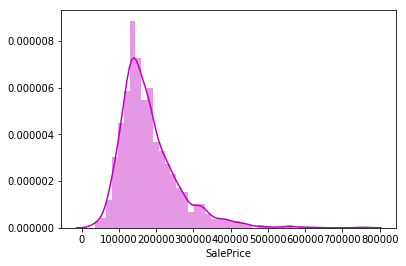

In [274]:
#sns.distplot(dfEntrenamiento["SalePrice"], hist=False, color="g", kde_kws={"shade": True})
sns.distplot(dfEntrenamiento["SalePrice"], color="m")


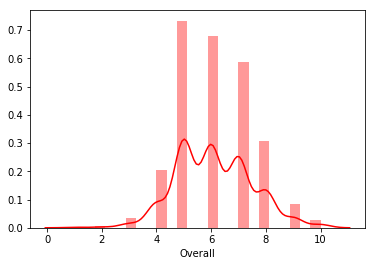

In [275]:
sns.distplot(dfEntrenamiento["Overall"], color="r")


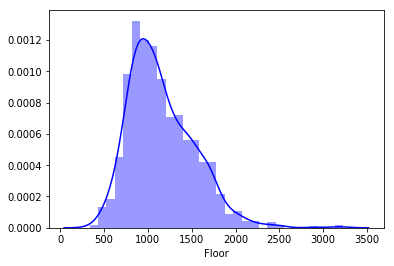

In [276]:
sns.distplot(dfEntrenamiento["Floor"], color="b")


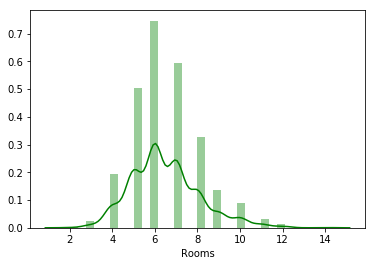

In [277]:
sns.distplot(dfEntrenamiento["Rooms"], color="g")


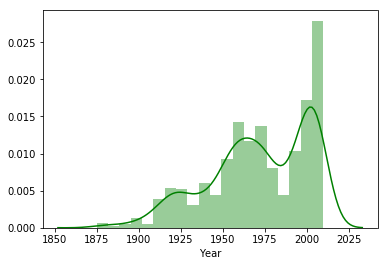

In [278]:
sns.distplot(dfEntrenamiento["Year"], color="g",bins=20)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


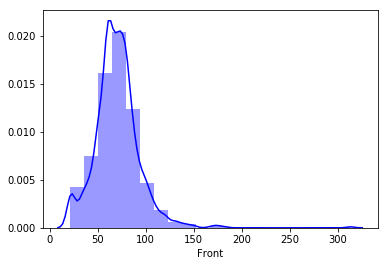

In [279]:
sns.distplot(dfEntrenamiento["Front"], color="b",bins=20)



# Graficas X,Y para observar el comportamiento del precio y sus variables

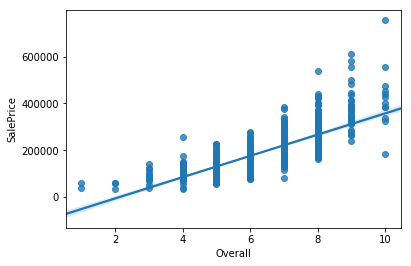

In [280]:
ax = sns.regplot(x="Overall", y="SalePrice", data=dfEntrenamiento)

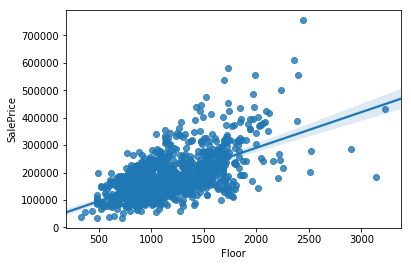

In [281]:
ax = sns.regplot(x="Floor", y="SalePrice", data=dfEntrenamiento)

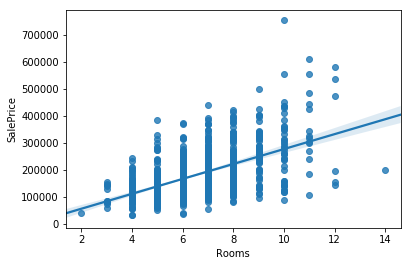

In [282]:
ax = sns.regplot(x="Rooms", y="SalePrice", data=dfEntrenamiento)

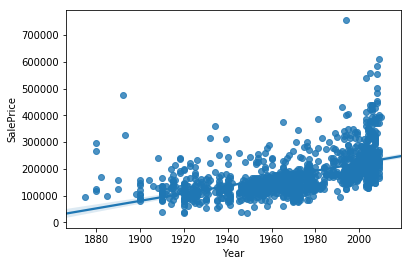

In [283]:
ax = sns.regplot(x="Year", y="SalePrice", data=dfEntrenamiento)

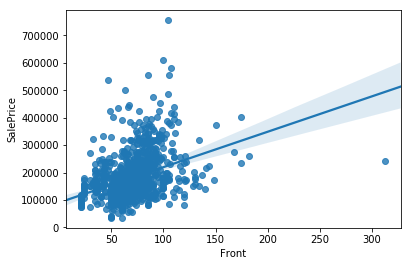

In [284]:
ax = sns.regplot(x="Front", y="SalePrice", data=dfEntrenamiento)

### Funcion de entrenamiento manual

## Se tomarán las 2 variables: Overall y Floor, segun la tendencia de las mismas

In [285]:
def regresionLineal(argX, argY, EPOCHS, imprimir_error_cada, lr):
    ##mb=np.array([0.1,0.2])
    count=0
    mb=np.array([27000.0, 96199.0])
    unos = np.ones_like(argX)
    arrXUnos=np.column_stack((argX,unos))
    vectorDeErrores=np.ndarray([])
    #vectorModeloMB=np.ndarray([])
    vectorModeloMB = np.ones(shape = (0, 2), dtype = float)
    arrError=np.ndarray([])
    
    ##error= 0.5*promedio*(argY-yhat)**2
    ### Para obtener la función de promedio, se va a dividir en dos unidades:
    ## La función según el texto es: error=1/2 * promedio ((y - yhat)**2)
    ##arrError= 0.5*(0.5*(argY-yhat)**2)
    
    while count < EPOCHS:
        yhat=np.dot(arrXUnos,mb)
        arrError= 0.5*(np.mean(argY-yhat)**2)
        gradiente = np.mean(np.dot(np.transpose(yhat - argY),arrXUnos))
        
        mb[0] = mb[0]-lr * gradiente
        mb[1] = mb[1]-lr * gradiente
        
        vectorDeErrores=np.append(vectorDeErrores,arrError)
        
        #vectorModeloMB=np.append(vectorDeErrores,np.ndarray(mb))
        vectorModeloMB=np.append(vectorModeloMB, [[mb[0], mb[1]]], axis = 0)
        ##vectorDeErrores=np.append(vectorDeErrores,arrError)
        
        if ((count % imprimir_error_cada == 0)):
            print("*Iteracion:", count, " Argumentos: ", 
                  mb , " *Error:", arrError, " *Gradiente: ",gradiente)
        count+=1

    
    return vectorModeloMB,vectorDeErrores
    #return vectorDeErrores.shape
    #return vectorModeloMB
regresionLineal(dfEntrenamiento["Overall"], dfEntrenamiento["SalePrice"], 50, 10, 0.0001)



*Iteracion: 0  Argumentos:  [-4275.40895 64923.59105]  *Error: 3226973589.75071  *Gradiente:  312754089.5
*Iteracion: 10  Argumentos:  [-28325281.20144622 -28256082.20144622]  *Error: 4793640444658220.0  *Gradiente:  421297699115.5335
*Iteracion: 20  Argumentos:  [-3.81783447e+10 -3.81782755e+10]  *Error: 8.697006273265163e+21  *Gradiente:  567512167670774.0
*Iteracion: 30  Argumentos:  [-5.14284429e+13 -5.14284428e+13]  *Error: 1.5781268656786648e+28  *Gradiente:  7.644714441368302e+17
*Iteracion: 40  Argumentos:  [-6.92770627e+16 -6.92770627e+16]  *Error: 2.863611471093676e+34  *Gradiente:  1.0297868877406821e+21


(array([[-4.27540895e+03,  6.49235911e+04],
        [ 6.00143217e+04,  1.29213322e+05],
        [-7.21396486e+04, -2.94064861e+03],
        [ 1.99516053e+05,  2.68715053e+05],
        [-3.58899407e+05, -2.89700407e+05],
        [ 7.88979412e+05,  8.58178412e+05],
        [-1.57060029e+06, -1.50140129e+06],
        [ 3.27975174e+06,  3.34895074e+06],
        [-6.69063189e+06, -6.62143289e+06],
        [ 1.38044887e+07,  1.38736877e+07],
        [-2.83252812e+07, -2.82560822e+07],
        [ 5.82766738e+07,  5.83458728e+07],
        [-1.19742305e+08, -1.19673106e+08],
        [ 2.46193508e+08,  2.46262707e+08],
        [-5.06024149e+08, -5.05954950e+08],
        [ 1.04023447e+09,  1.04030367e+09],
        [-2.13825474e+09, -2.13818554e+09],
        [ 4.39544768e+09,  4.39551687e+09],
        [-9.03523102e+09, -9.03516182e+09],
        [ 1.85728721e+10,  1.85729413e+10],
        [-3.81783447e+10, -3.81782755e+10],
        [ 7.84794565e+10,  7.84795257e+10],
        [-1.61322320e+11, -1.613

### Función para Overall

In [286]:
resultadoOverall=regresionLineal(dfEntrenamiento["Overall"], dfEntrenamiento["SalePrice"], 50, 10, 0.0001)
print(resultadoOverall)

*Iteracion: 0  Argumentos:  [-4275.40895 64923.59105]  *Error: 3226973589.75071  *Gradiente:  312754089.5
*Iteracion: 10  Argumentos:  [-28325281.20144622 -28256082.20144622]  *Error: 4793640444658220.0  *Gradiente:  421297699115.5335
*Iteracion: 20  Argumentos:  [-3.81783447e+10 -3.81782755e+10]  *Error: 8.697006273265163e+21  *Gradiente:  567512167670774.0
*Iteracion: 30  Argumentos:  [-5.14284429e+13 -5.14284428e+13]  *Error: 1.5781268656786648e+28  *Gradiente:  7.644714441368302e+17
*Iteracion: 40  Argumentos:  [-6.92770627e+16 -6.92770627e+16]  *Error: 2.863611471093676e+34  *Gradiente:  1.0297868877406821e+21
(array([[-4.27540895e+03,  6.49235911e+04],
       [ 6.00143217e+04,  1.29213322e+05],
       [-7.21396486e+04, -2.94064861e+03],
       [ 1.99516053e+05,  2.68715053e+05],
       [-3.58899407e+05, -2.89700407e+05],
       [ 7.88979412e+05,  8.58178412e+05],
       [-1.57060029e+06, -1.50140129e+06],
       [ 3.27975174e+06,  3.34895074e+06],
       [-6.69063189e+06, -6.6214

### Función para floor

In [287]:
resultadoFloor=regresionLineal(dfEntrenamiento["Floor"], dfEntrenamiento["SalePrice"], 50, 10, 0.000001)
print(resultadoFloor)

*Iteracion: 0  Argumentos:  [-23207835.8162355 -23138636.8162355]  *Error: 484736044041592.5  *Gradiente:  23234835816235.5
*Iteracion: 10  Argumentos:  [-5.30135288e+36 -5.30135288e+36]  *Error: 2.528733321340055e+73  *Gradiente:  5.3074977388203455e+42
*Iteracion: 20  Argumentos:  [-1.21097987e+66 -1.21097987e+66]  *Error: 1.3194819420345122e+132  *Gradiente:  1.2123835292134681e+72
*Iteracion: 30  Argumentos:  [-2.76622265e+95 -2.76622265e+95]  *Error: 6.8849988279212945e+190  *Gradiente:  2.7694290120127375e+101
*Iteracion: 40  Argumentos:  [-6.31883978e+124 -6.31883978e+124]  *Error: 3.592562152641985e+249  *Gradiente:  6.326164013093745e+130
(array([[-2.32078358e+007, -2.31386368e+007],
       [ 2.00221876e+010,  2.00222568e+010],
       [-1.72737467e+013, -1.72737466e+013],
       [ 1.49025836e+016,  1.49025836e+016],
       [-1.28569095e+019, -1.28569095e+019],
       [ 1.10920446e+022,  1.10920446e+022],
       [-9.56944234e+024, -9.56944234e+024],
       [ 8.25584729e+027,  8

##  Visualización de errores

In [305]:
#ax = sns.regplot(x="Front", y="SalePrice", data=dfEntrenamiento)
#type(resultadoFloor[0])

def graficar_error(errores, variableCasa,inicio, fin):
    arrRectaNumerica = np.arange(np.size(errores) + 1)
    
    plt.plot(arrRectaNumerica[:fin:inicio], errores[:fin:inicio])
    plt.title('Comportamiento del error para ' + str(variableCasa))
    plt.ylabel('Y - Error')
    plt.xlabel('X - Numero de Iteracion')    
    plt.show()

##ax = sns.regplot(x="Front", y="SalePrice", data=dfValidacion)
    

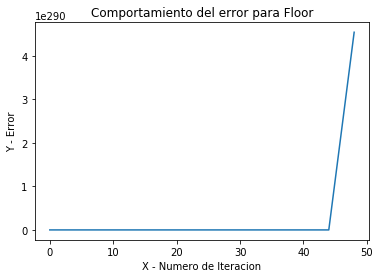

In [302]:
#ax = sns.regplot(x="Front", y="SalePrice", data=dfEntrenamiento)
#type(resultadoFloor[0])

graficar_error(resultadoFloor[1],"Floor", 4,1000)

## Modelo con Sk

In [290]:
def entrenamientoSKT(x, y):
    modeloSkt = LinearRegression()    
    modeloSkt.fit(x,y)
    return np.append(modeloSkt.coef_.flatten(), modeloSkt.intercept_.flatten())



### Entrenando modelo

## Entrenamiento para Overall 

In [291]:
serY = dfEntrenamiento["SalePrice"]
serX = dfEntrenamiento["Overall"]

xx=np.array(dfEntrenamiento["Overall"].values.tolist())
yy=np.array(dfEntrenamiento["SalePrice"].values.tolist())

print(entrenamientoSKT(xx.reshape(-1, 1), yy.reshape(-1, 1)))


[ 45411.99877916 -96469.57131874]


### Entrenamiento para Floor

In [292]:
xx=np.array(dfEntrenamiento["Floor"].values.tolist())
yy=np.array(dfEntrenamiento["SalePrice"].values.tolist())

print(entrenamientoSKT(xx.reshape(-1, 1), yy.reshape(-1, 1)))


[  129.95124229 30324.58517496]


# Conclusiones finales: 

En base a los modelos entrenados manualmente y con la herramienta Sklearn, se pueden concluir los siguientes modelos para las variables: Overall y Floor, que según las graficas, y el analisis exploratorio, tienden a tener mayor relación con el precio de las casas:

Para Overall:
Y = 45411.99*X-96469.57

Para Floor:
Y = 129.95*X+30324.58





In [293]:

######## Codigo comentado que ha optimizado

# lmplot(x, y, data=dsDatosEntrenamiento, fit_reg=False)
#dsDatosEntrenamiento.columns = ["Sequence", "Start", "End", "Coverage"]
##arrPrecio=dsDatosEntrenamiento[:,0]
##arrOver=dsDatosEntrenamiento[:,1]
##arrFloor=dsDatosEntrenamiento[:,2]
##arrRooms=dsDatosEntrenamiento[:,3]
##arrYear=dsDatosEntrenamiento[:,4]
##arrFront=dsDatosEntrenamiento[:,5]


##mediaPrecio=np.mean(dsPrecio)
##minPrecio=np.min(dsPrecio)
##maxPrecio=np.max(dsPrecio)
##stdPrecio=np.std(dsPrecio)

##dsOverallQual=dsDatosEntrenamiento[:,1]
##mediaOverallQual=np.mean(dsOverallQual)
##minOverallQual=np.min(dsOverallQual)
##maxOverallQual=np.max(dsOverallQual)
##stdOverallQual=np.std(dsOverallQual)
##print(mediaOverallQual)
##print(minOverallQual)
##print(maxOverallQual)
##print(stdOverallQual)


